# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

In [5]:
# create a dataframe
cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(columns={0:"City"})


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Create additional columns to store data from API request
cities_df['Country'] = ''
cities_df['Longitude'] = ''
cities_df['Latitude'] = ''
cities_df['Date'] = ''
cities_df['Cloudiness'] = ''
cities_df['Temperature Max'] = ''
cities_df['Humidity'] = ''
cities_df['Wind speed'] = ''


# Create counter
row_count = 1

# loop through cities, make API request, and append desired results
print("Beginning Data Retrieval")
print("-------------------------")

# Create a dictionary with parameters to access API
access = {"appid": api_key, "units": "imperial"}

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query url
query_url = f"{url}appid={access['appid']}&units={access['units']}&q="


for index, row in cities_df.iterrows():
    city = row["City"]
    #response = requests.get(url + city).json()
    response = requests.get(query_url + city).json()
  
    if response['cod'] != "404":
        cities_df.set_value(index, "Country", response["sys"]["country"])
        cities_df.set_value(index,"Longitude", response["coord"]["lon"])
        cities_df.set_value(index, "Latitude", response["coord"]["lat"])
        cities_df.set_value(index, "Date", response['dt'])
        cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
        cities_df.set_value(index, "Temperature Max", response["main"]["temp_max"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Wind speed", response["wind"]["speed"])
        
        print(f"Processing Record {row_count} | {city}")
        
        row_count += 1
   
    else:
        print(f"City not found. Skipping...")
        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")
                                     
        


Beginning Data Retrieval
-------------------------
Processing Record 1 | torbay


C:\Users\Faithalone_Data\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Faithalone_Data\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Faithalone_Data\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Faithalone_Data\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Faithalone_Data\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[

Processing Record 2 | hermanus
Processing Record 3 | bredasdorp
Processing Record 4 | grindavik
Processing Record 5 | barrow
Processing Record 6 | surt
City not found. Skipping...
Processing Record 7 | awbari
Processing Record 8 | denpasar
Processing Record 9 | provideniya
Processing Record 10 | ushuaia
Processing Record 11 | rincon
Processing Record 12 | kodiak
Processing Record 13 | nuevo casas grandes
Processing Record 14 | kruisfontein
City not found. Skipping...
Processing Record 15 | sisimiut
City not found. Skipping...
Processing Record 16 | mataura
Processing Record 17 | ondangwa
Processing Record 18 | ribeira grande
Processing Record 19 | fortuna
Processing Record 20 | hithadhoo
Processing Record 21 | kavieng
Processing Record 22 | gimli
Processing Record 23 | saint george
Processing Record 24 | punta arenas
Processing Record 25 | bacungan
Processing Record 26 | shelburne
Processing Record 27 | sarahan
Processing Record 28 | mangrol
Processing Record 29 | dunedin
Processing Re

Processing Record 226 | hambantota
Processing Record 227 | vinh
Processing Record 228 | pitimbu
Processing Record 229 | nemuro
Processing Record 230 | flinders
Processing Record 231 | ibirite
City not found. Skipping...
Processing Record 232 | yurimaguas
Processing Record 233 | poum
Processing Record 234 | sulangan
Processing Record 235 | oga
Processing Record 236 | thompson
Processing Record 237 | south lake tahoe
Processing Record 238 | achalpur
Processing Record 239 | rio gallegos
Processing Record 240 | margate
Processing Record 241 | ambilobe
Processing Record 242 | varna
Processing Record 243 | upernavik
Processing Record 244 | ternate
Processing Record 245 | ulladulla
Processing Record 246 | santa maria
Processing Record 247 | zinder
Processing Record 248 | tautira
Processing Record 249 | alta floresta
Processing Record 250 | kaputa
Processing Record 251 | kiruna
Processing Record 252 | zunyi
Processing Record 253 | auki
City not found. Skipping...
Processing Record 254 | singar

Processing Record 456 | aleksandro-nevskiy
Processing Record 457 | mantua
Processing Record 458 | tiarei
Processing Record 459 | cotonou
Processing Record 460 | hope
Processing Record 461 | el alto
Processing Record 462 | shenzhen
Processing Record 463 | uyuni
Processing Record 464 | kavaratti
Processing Record 465 | nuuk
Processing Record 466 | oktyabrskoye
Processing Record 467 | maxixe
Processing Record 468 | szczytno
Processing Record 469 | huarmey
Processing Record 470 | totness
Processing Record 471 | cockburn town
Processing Record 472 | bhadrak
Processing Record 473 | ketchikan
City not found. Skipping...
Processing Record 474 | belaya gora
Processing Record 475 | sistranda
Processing Record 476 | kieta
Processing Record 477 | lichinga
Processing Record 478 | cayenne
Processing Record 479 | yar-sale
Processing Record 480 | mariental
Processing Record 481 | vila
City not found. Skipping...
Processing Record 482 | iquique
Processing Record 483 | kedrovyy
Processing Record 484 | s

In [7]:
# Cities dataframe from the openweather api call
cities_df.head()

,City,Country,Longitude,Latitude,Date,Cloudiness,Temperature Max,Humidity,Wind speed
0,deputatskiy,RU,139.9,69.3,1551105767,20,-31.38,0,2.73
1,vaini,IN,74.49,15.34,1551105767,0,76.13,54,5.19
2,jeremie,HT,-74.12,18.65,1551105767,0,80.14,84,4.52
3,tyup,KG,78.36,42.73,1551105767,0,5.35,76,3.62
4,hamilton,BM,-64.78,32.3,1551102900,75,71.6,88,28.86


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Count total number of rows in the dataframe
cities_df.count()

City               645
Country            645
Longitude          645
Latitude           645
Date               645
Cloudiness         645
Temperature Max    645
Humidity           645
Wind speed         645
dtype: int64

In [8]:
cities_df[["Latitude", "Temperature Max"]] = cities_df[["Latitude", "Temperature Max"]].apply(pd.to_numeric, errors='coerce')

In [9]:
cities_df.head()

,City,Country,Longitude,Latitude,Date,Cloudiness,Temperature Max,Humidity,Wind speed
0,torbay,CA,-52.73,47.66,1551153763,75,30.99,92,14.99
1,hermanus,ZA,19.24,-34.42,1551153751,56,66.99,93,5.99
2,bredasdorp,ZA,20.04,-34.53,1551153751,64,66.99,93,5.99
3,grindavik,IS,-22.43,63.84,1551151800,90,44.60,100,11.41
4,barrow,AR,-60.23,-38.31,1551154221,32,48.33,69,11.32


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

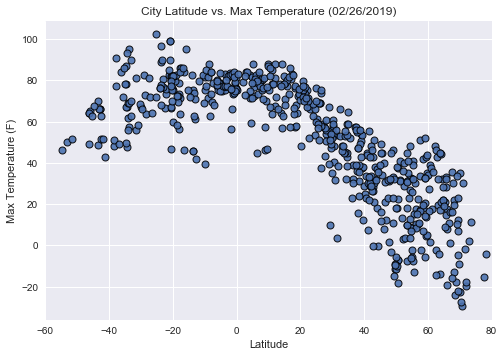

In [11]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(cities_df["Latitude"], 
            cities_df["Temperature Max"], edgecolor="black", linewidths=1, marker="o",\
            cmap='plasma', alpha=0.9, label="City")

#Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().strftime('%m/%d/%Y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
# plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

In [12]:
cities_df["Humidity"] = cities_df["Humidity"].apply(pd.to_numeric, errors='coerce')

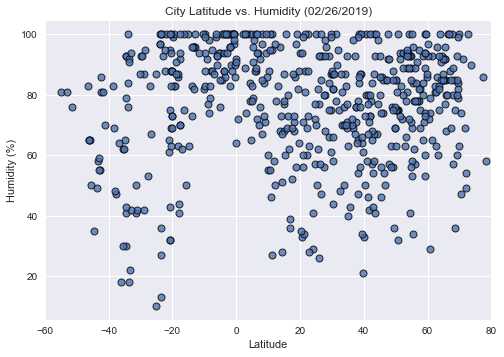

In [13]:
#Build a scatter plot for Latitude vs. Humidity

plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity"], edgecolor="black", linewidths=1, marker="o",\
            cmap='plasma', alpha=0.8, label="City")

#Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity ({datetime.now().strftime('%m/%d/%Y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
# plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [14]:
cities_df ["Cloudiness"]= cities_df["Cloudiness"].apply(pd.to_numeric, errors='coerce')

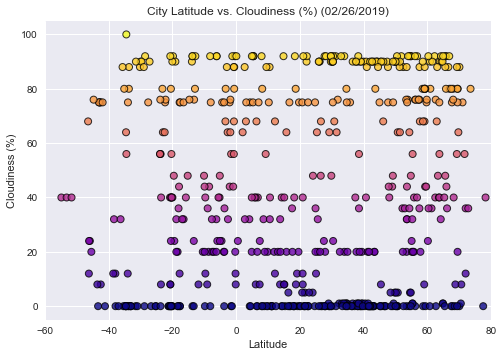

In [15]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness"], c=cities_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) ({datetime.now().strftime('%m/%d/%Y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
#plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [16]:
cities_df ["Wind speed"]= cities_df["Wind speed"].apply(pd.to_numeric, errors='coerce')

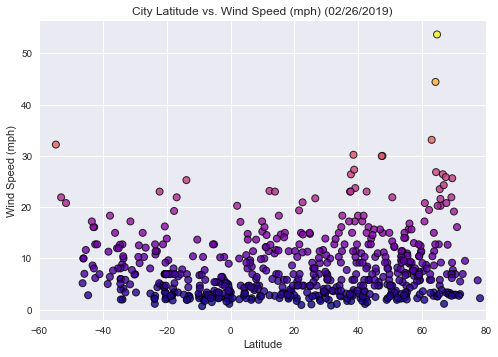

In [17]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(cities_df["Latitude"], 
            cities_df["Wind speed"], c=cities_df["Wind speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) ({datetime.now().strftime('%m/%d/%Y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
#plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()

In [18]:
cities_df.to_csv('weather_city.csv')